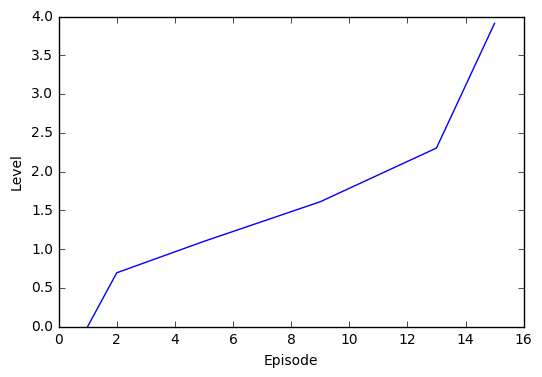

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y = np.array([1, 2, 3, 5, 10, 50], np.float32)
y = np.log(y)
x = np.array([1, 2, 5, 9, 13, 15])
plt.plot(x, y)
plt.xlabel("Episode")
plt.ylabel("Level")

In [3]:
X = np.array([[1, 2, 5, 9, 13, 15],[1, 1, 1, 1, 1, 1]], np.float32)
Y = np.array([1, 2, 3, 5, 10, 50], np.float32)

## 回帰モデル
 * $y$はレベル，$x$は話数とする．レベルがインフレしそうなので，対数をとって，線形回帰するモデルを考える．
 * 線形回帰のパラメタ$ A = [a, b] $をとすると，以下のように回帰モデルが書ける．
$$log(y)=a \cdot x + b$$
$$log(y)=[a ,b] \cdot \left[ {\begin{matrix}
  x \\ 
  1 
\end{matrix}} \right] = A \cdot x $$

 * ここで，放送済データ（観測データ）を$X$と$Y$とする．

$$ Y = \left[ log(y_1), log(y_2), ..., log(y_N) \right] $$

 * $X$は，オフセットのために$1$を追加する．

$$ X = \left[ {\begin{matrix}
  {{x_1}}&{{x_1}}& \cdots &{{x_N}} \\\
  1&1& \cdots &1 
\end{matrix}} \right]$$

 * ロスを以下のように定義し，それを最小化するような$A$を求める．

$$
L = (Y-A*X)(Y-A*X)' \\\
\frac{{\partial L}}{{\partial A}} = -2XY'+ 2XX'A' \\\
XY' = XX'A' \\\
YX' = AX'X \\\
A = YX'(XX')^{-1}
$$

In [14]:
XX=np.dot(X,np.transpose(X))
np.linalg.inv(XX)
a = np.linalg.inv(np.dot(X,np.transpose(X)))

logY = np.log(Y)
A = np.dot(logY, np.dot(np.transpose(X), a))
print(A)

[ 0.2260281  -0.09257656]


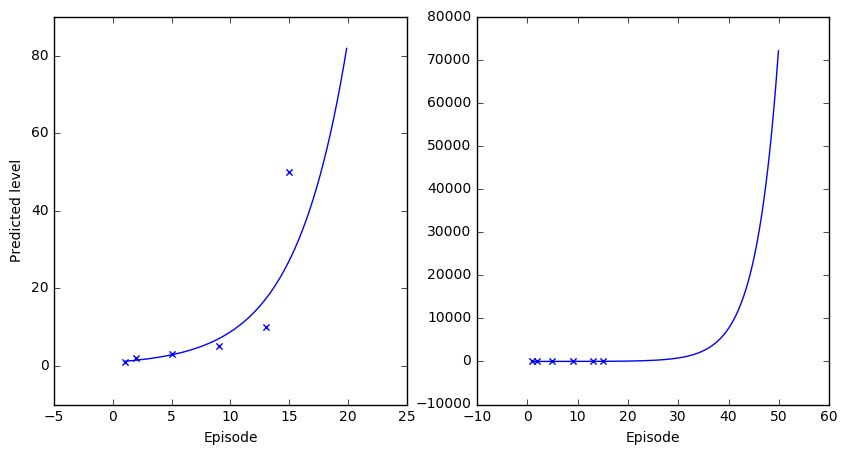

In [15]:
plt.figure(figsize=(10,5));

plt.subplot(121);
x_p = np.arange(1,20,0.1)
tmp=A[0]*x_p+A[1]
y_p=np.exp(tmp)
x = [1, 2, 5, 9, 13, 15];
y = [1, 2, 3, 5, 10, 50];
plt.plot(x_p,y_p)
plt.scatter(x, y, marker="x")
plt.xlabel('Episode'); plt.ylabel('Predicted level');

plt.subplot(122);
x_p = np.arange(1,50,0.1)
y_p=np.exp(A[0]*x_p+A[1])
plt.plot(x_p,y_p)
plt.scatter(x, y, marker="x")
plt.xlabel('Episode');